<a href="https://colab.research.google.com/github/AleWstyd/GAN-emotional-stimuli/blob/main/AffectNet_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# to surpress output
%%capture 
# takes around 33 minutes to unpack
# this is actually enough to extract all rars
!unrar x /content/drive/MyDrive/AffectNet/Manually_Annotated.part01.rar /content

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Extracting  /content/Manually_Annotated_Images/993/1f50cf262b08b04eb6667ffb7aa3bab2919befd51bbb772373f91d60.jpg      99%  OK 
Extracting  /content/Manually_Annotated_Images/993/c737751bb144f1b07ff589fc8c959c826c1af0f7c09ed57b3bd0c849.jpg      99%  OK 
Extracting  /content/Manually_Annotated_Images/993/5b7d75cacb3a38e56caa88d9626c941d2aca41e3425e7e046166f82c.jpg      99%  OK 
Extracting  /content/Manually_Annotated_Images/993/ca2e375f7595be55d0592ecab62ebcdab06da9e7666f268fdb51f50e.jpg      99%  OK 
Extracting  /content/Manually_Annotated_Images/993/537c21f33ed7ecda262b8c4bcea0eeab1a49df873e567ad9d14abd8a.jpg      99%  OK 
Extracting  /content/Manually_Annotated_Images/993/e070a5dc3605b9398e6912df9e641e62de356617a9b69b8401d0e58f.jpg      99%  OK 
Extracting  /content/Manually_Annotated_Images/993/720f178535450a8ca8559aece8def4650d5fa0388ce58305d8dac91b.jpg      99%

In [ ]:
!du -sh /content/Manually_Annotated_Images

55G	/content/Manually_Annotated_Images


In [ ]:
import pandas as pd
import numpy as np
import image 
from os.path import isfile

In [ ]:
path_to_csv = '/content/drive/MyDrive/training.csv'
df = pd.read_csv(path_to_csv)
df.head(5)

,subDirectory_filePath,face_x,face_y,face_width,face_height,facial_landmarks,expression,valence,arousal
0,689/737db2483489148d783ef278f43f486c0a97e140fc...,134,134,899,899,181.64;530.91;188.32;627.82;195.1;723.37;205.2...,1,0.785714,-0.055556
1,392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b5532...,20,20,137,137,28.82;77.52;29.12;93.25;31.04;108.51;33.03;123...,0,-0.017253,0.004313
2,468/21772b68dc8c2a11678c8739eca33adb6ccc658600...,11,11,176,176,30.52;87.33;32.55;106.43;36.94;125.81;43.06;14...,0,0.174603,0.007937
3,944/06e9ae8d3b240eb68fa60534783eacafce2def60a8...,40,40,269,269,44.43;158.17;47.08;189.2;50.54;221.88;58.3;253...,1,0.153401,0.038890
4,993/02e06ee5521958b4042dd73abb444220609d96f57b...,22,22,153,153,50.59;78.72;48.6;93.23;48.72;109.06;48.8;123.0...,8,0.783972,-0.551684


In [ ]:
emotions = {0: 'Neutral', 
            1: 'Happy', 
            2: 'Sad',
            3: 'Surprise',
            4: 'Fear',
            5: 'Disgust',
            6: 'Anger',
            7: 'Contempt',
            8: 'None',
            9: 'Uncertain',
            10: 'No-Face'}

In [ ]:
for i in range(len(emotions)):
  dlugosc = len(df[df['expression']==i])
  print('{0:9} - length= {1}'.format(emotions[i],dlugosc))

Neutral   - length= 74874
Happy     - length= 134415
Sad       - length= 25459
Surprise  - length= 14090
Fear      - length= 6378
Disgust   - length= 3803
Anger     - length= 24882
Contempt  - length= 3750
None      - length= 33088
Uncertain - length= 11645
No-Face   - length= 82415


In [ ]:
path = '/content/Manually_Annotated_Images/'
for index, row in df.iterrows():
  if index > 10:
    break
  file_path = path + row['subDirectory_filePath']
  print(file_path)
  print(isfile(file_path))


/content/Manually_Annotated_Images/689/737db2483489148d783ef278f43f486c0a97e140fc4b6b61b84363ca.jpg
True
/content/Manually_Annotated_Images/392/c4db2f9b7e4b422d14b6e038f0cdc3ecee239b55326e9181ee4520f9.jpg
True
/content/Manually_Annotated_Images/468/21772b68dc8c2a11678c8739eca33adb6ccc658600e4da2224080603.jpg
True
/content/Manually_Annotated_Images/944/06e9ae8d3b240eb68fa60534783eacafce2def60a86042f9b7d59544.jpg
True
/content/Manually_Annotated_Images/993/02e06ee5521958b4042dd73abb444220609d96f57b1689abbe87c024.jpg
True
/content/Manually_Annotated_Images/979/f675c6a88cdef99a6d8b0261741217a0319387fcf1571a174f99ac81.jpg
True
/content/Manually_Annotated_Images/637/94b769d8e880cbbea8eaa1350cb8c094a03d27f9fef44e1f4c0fb2ae.jpg
True
/content/Manually_Annotated_Images/997/b81f843f08ce3bb0c48b270dc58d2ab8bf5bea3e2262e50bbcadbec2.jpg
True
/content/Manually_Annotated_Images/358/21a32dd1c1ecd57d3e8964621c911df1c0b3348a4ae5203b4a243230.JPG
True
/content/Manually_Annotated_Images/330/60216cf5171a1f18

In [ ]:
existing_files = df['subDirectory_filePath'].apply(lambda x: True if isfile(path+x) else False )

**All images from the csv file exist, were extracted properly**

In [ ]:
print(existing_files.describe())
print(len(df))

count     414799
unique         1
top         True
freq      414799
Name: subDirectory_filePath, dtype: object
414799


In [ ]:
dropped = df[df['expression'] < 7]

In [ ]:
for i in range(len(emotions)):
  dlugosc = len(dropped[dropped['expression']==i])
  print('{0:9} - length= {1}'.format(emotions[i],dlugosc))
print('{0:9} - length= {1}'.format('Sum',len(dropped)))

Neutral   - length= 74874
Happy     - length= 134415
Sad       - length= 25459
Surprise  - length= 14090
Fear      - length= 6378
Disgust   - length= 3803
Anger     - length= 24882
Contempt  - length= 0
None      - length= 0
Uncertain - length= 0
No-Face   - length= 0
Sum       - length= 283901


In [ ]:
from PIL import Image

In [ ]:
def load_images(df,n=25):
  faces = list()
  count = 0
  for index, row in df.iterrows():
    if count == n:
      break
    count +=1
    file_path = path + row['subDirectory_filePath']
    image = Image.open(file_path)
    image = image.convert('RGB')
    pixels = np.asarray(image)
    faces.append(pixels)
  return faces

In [ ]:
faces = load_images()
len(faces)

25

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def plot_faces(faces, n):
  plt.figure(figsize=(12,8))
  for i in range(n * n):
      plt.subplot(n, n, 1 + i)
      plt.axis('off')
      plt.imshow(faces[i])
  plt.show()

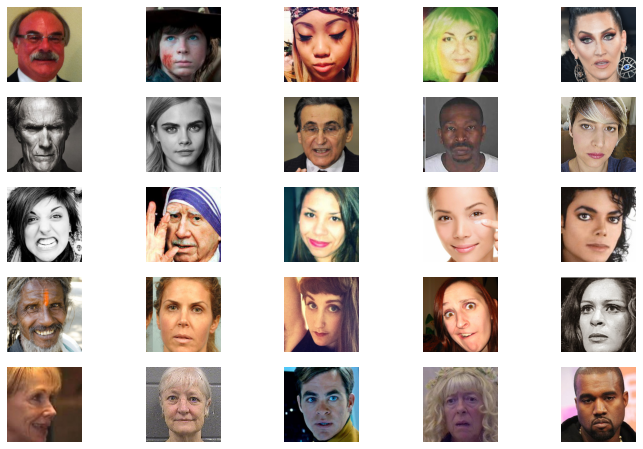

In [ ]:
plot_faces(faces, 5)

In [ ]:
def extract_face(row, pixels, required_size = (80,80)):
  x1,y1 = row['face_x'], row['face_y']
  x2 = x1 + row['face_width']
  y2 = y1 + row['face_height']
  face_pixels = pixels[y1:y2, x1:x2]
  image = Image.fromarray(face_pixels)
  image = image.resize(required_size)
  face_array = np.asarray(image)
  return face_array

In [ ]:
def load_cropped_images(df,path,n=25):
  faces = list()
  for index, row in df.iterrows():
    file_path = path + row['subDirectory_filePath']
    image = Image.open(file_path)
    image = image.convert('RGB')
    pixels = np.asarray(image)

    face = extract_face(row, pixels)

    faces.append(face)
    if len(faces) >= n: 
      break
  return np.asarray(faces)

In [ ]:
cropped_faces = load_cropped_images(dropped)
len(cropped_faces)
cropped_faces.shape

(25, 80, 80, 3)

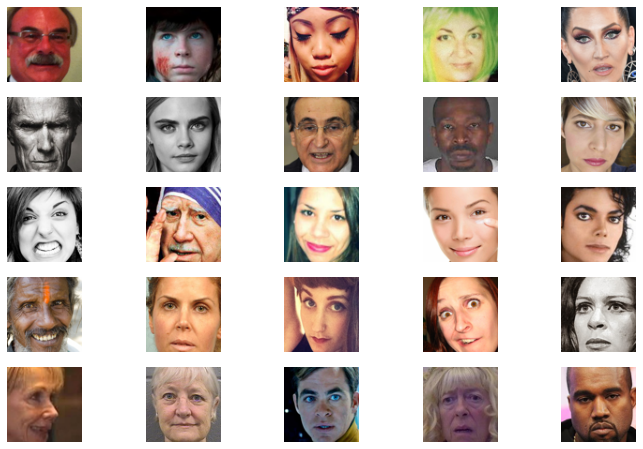

In [ ]:
plot_faces(cropped_faces, 5)

In [ ]:
path = '/content/Manually_Annotated_Images/'
final_time = 0 
for i in range(1,7):
  df = dropped[dropped['expression']==i]
  print(f'Starting : {emotions[i]}')
  start = time.time()
  faces = load_cropped_images(df,path, 50000)
  end = time.time()
  final_time += (end - start)/60
  print('{0:.3f} mins'.format((end - start)/60))
  save_path = '/content/' + str(i) + '.npz'
  print(save_path)
  print(faces.shape)
  print()
  np.savez_compressed(save_path, faces)
print('Final time: {0:.3f} mins'.format(final_time)

Starting : Happy
22.382 mins
/content/1.npz
(50000, 80, 80, 3)

Starting : Sad
9.087 mins
/content/2.npz
(25459, 80, 80, 3)

Starting : Surprise
5.927 mins
/content/3.npz
(14090, 80, 80, 3)

Starting : Fear
2.097 mins
/content/4.npz
(6378, 80, 80, 3)

Starting : Disgust
1.280 mins
/content/5.npz
(3803, 80, 80, 3)

Starting : Anger
8.503 mins
/content/6.npz
(24882, 80, 80, 3)



In [ ]:
import time

In [ ]:
path = '/content/Manually_Annotated_Images/'
df = dropped[dropped['expression']==0]
save_path = '/content/' + str(i) + '.npz'
print(save_path)

/content/0.npz


In [ ]:
start = time.time()
faces = load_cropped_images(df,path, 50000)
end = time.time()
print('{0:.3f} s'.format(end - start))
print(faces.shape)

1121.168 s
(50000, 80, 80, 3)


In [ ]:
np.savez_compressed(save_path, faces)

In [ ]:
!zip -r /content/AffectNetPreprocessed.zip /content/AffectNetPreprocessed

  adding: content/AffectNetPreprocessed/ (stored 0%)
  adding: content/AffectNetPreprocessed/5.npz (deflated 0%)
  adding: content/AffectNetPreprocessed/2.npz (deflated 0%)
  adding: content/AffectNetPreprocessed/1.npz (deflated 0%)
  adding: content/AffectNetPreprocessed/0.npz (deflated 0%)
  adding: content/AffectNetPreprocessed/4.npz (deflated 0%)
  adding: content/AffectNetPreprocessed/6.npz (deflated 0%)
  adding: content/AffectNetPreprocessed/3.npz (deflated 0%)


In [ ]:
path = '/content/AffectNetPreprocessed/0.npz'
neutral = np.load(path)
neutral_faces = neutral['arr_0']

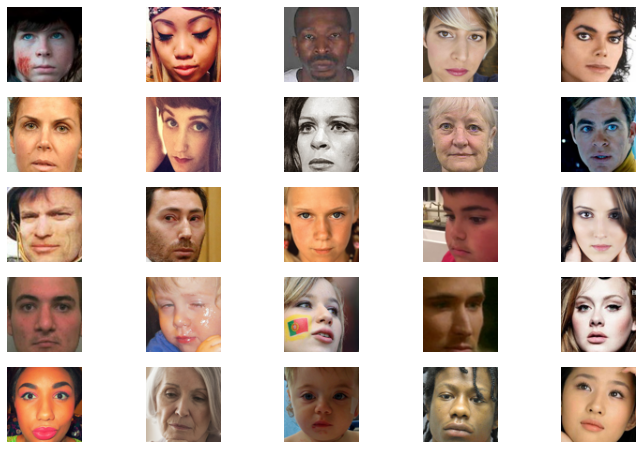

In [ ]:
plot_faces(neutral_faces, 5)

Sad
(25, 80, 80, 3)


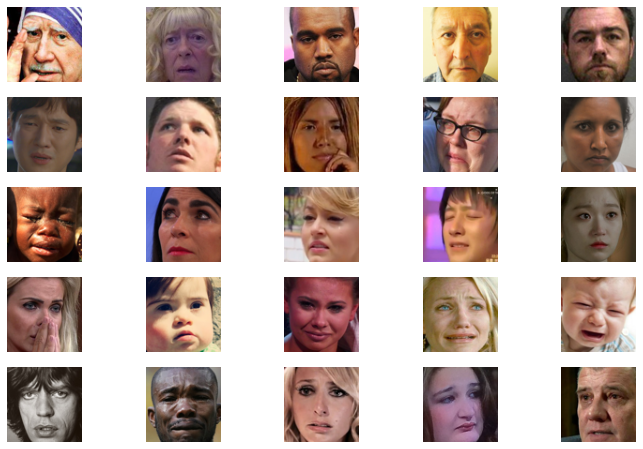

In [ ]:
print(emotions[2])
Sad = dropped[dropped['expression'] == 2]
path = '/content/Manually_Annotated_Images/'
Sad_faces = load_cropped_images(Sad,path)
print(Sad_faces.shape)
plot_faces(Sad_faces, 5)

Happy
(25, 80, 80, 3)


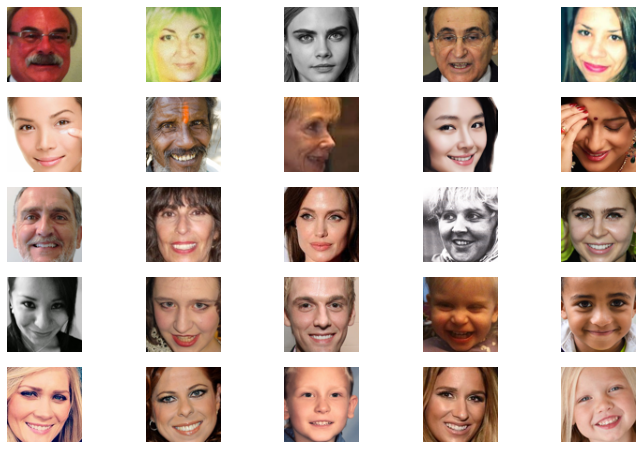

In [ ]:
print(emotions[1])
happy = dropped[dropped['expression'] == 1]
path = '/content/Manually_Annotated_Images/'
happy_faces = load_cropped_images(happy,path)
print(happy_faces.shape)
plot_faces(happy_faces, 5)